In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets
import collections
%matplotlib inline


In [41]:
'''
Peform test and train split
'''
def test_train_split(predictor_data,response_data,test_size):
    trainset_x = predictor_data.sample(frac = test_size)
    testset_x = pd.DataFrame(predictor_data.drop(trainset_x.index))
    trainset_y = response_data.sample(frac = test_size)
    testset_y = pd.DataFrame(response_data.drop(trainset_y.index))
    return trainset_x,testset_x,trainset_y, testset_y
'''
Euclidean Distance
'''
def eDist(x,y,param):
    # Euclidean Distance
    distance=0
    for i in range(param):
        distance+=np.sqrt(pow((x[i]-y[i]),2))
    return np.sqrt(distance)

'''
Taxicab Distance
'''
def dist(x,y,param):
    # Taxi-cab
    distance = 0
    for i in range(param):
        distance+=np.abs(x[i]-y[i])
    return distance

def MSE(Y1,Y2):
    return np.mean( (Y1-Y2)**2 )

'''
Misclassification Rate
'''
def mcr(Y1,Y2):
    return ((np.count_nonzero(np.abs(Y1-Y2))/len(Y2)))

'''
Standardize the value 
x = x- mean/std dev
'''
def standardize(data):
    m_d = data.mean().values
    s_d = data.std().values
    data = (data-m_d)/s_d
    #print(s_d)
    return data, m_d, s_d

'''
KNN implementation
'''
def KNN(T, X, Y, degree,cls=True, K=30, d=eDist):
    #standardize the data
    X, mean, stdev =  standardize(X)
    T = (T-mean)/stdev
    Y_pred = np.zeros(len(T))
    total_dist = []
    for k,t in enumerate(T.values):
        D=[]
        for elem in X.values:
            #calculate the distance
             D.append(d(t,elem,degree))
        #print(len(D))
        I = np.argsort(D)
        if(cls):
            #majority voting if classification else mean
            r = majority_vot(Y[I[:K]])
        else:
            r = np.mean(Y[(I[:K])])
        Y_pred[k] = r
    return Y_pred

def majority_vot(array):
    #class with highest occurence
    return collections.Counter(array).most_common()[0][0]

### Red Wine Dataset and Iris Dataset 

In [53]:
'''
Load Iris and Redwine dataset and create test and train testdataset
'''
data1 = datasets.load_iris()
d1 = pd.DataFrame(data1.data, columns=data1.feature_names)
d2 =  pd.read_csv(r'D:\Exercises\ML Lab\winequality-red.csv', sep=';')
d2_target=np.array(d2['quality'])
features = list(d2)
features.remove('free sulfur dioxide')
features.remove('citric acid')
features.remove('quality')
features.remove('density')
#normalize the train set and store the value

xTrain_d1, xTest_d1, yTrain_d1, yTest_d1 = test_train_split(d1, data1.target,
                                                test_size=0.3)
xTrain_d2, xTest_d2, yTrain_d2, yTest_d2 = test_train_split(d2[features], d2_target,
                                                test_size=0.3)

### Redwine Dataset

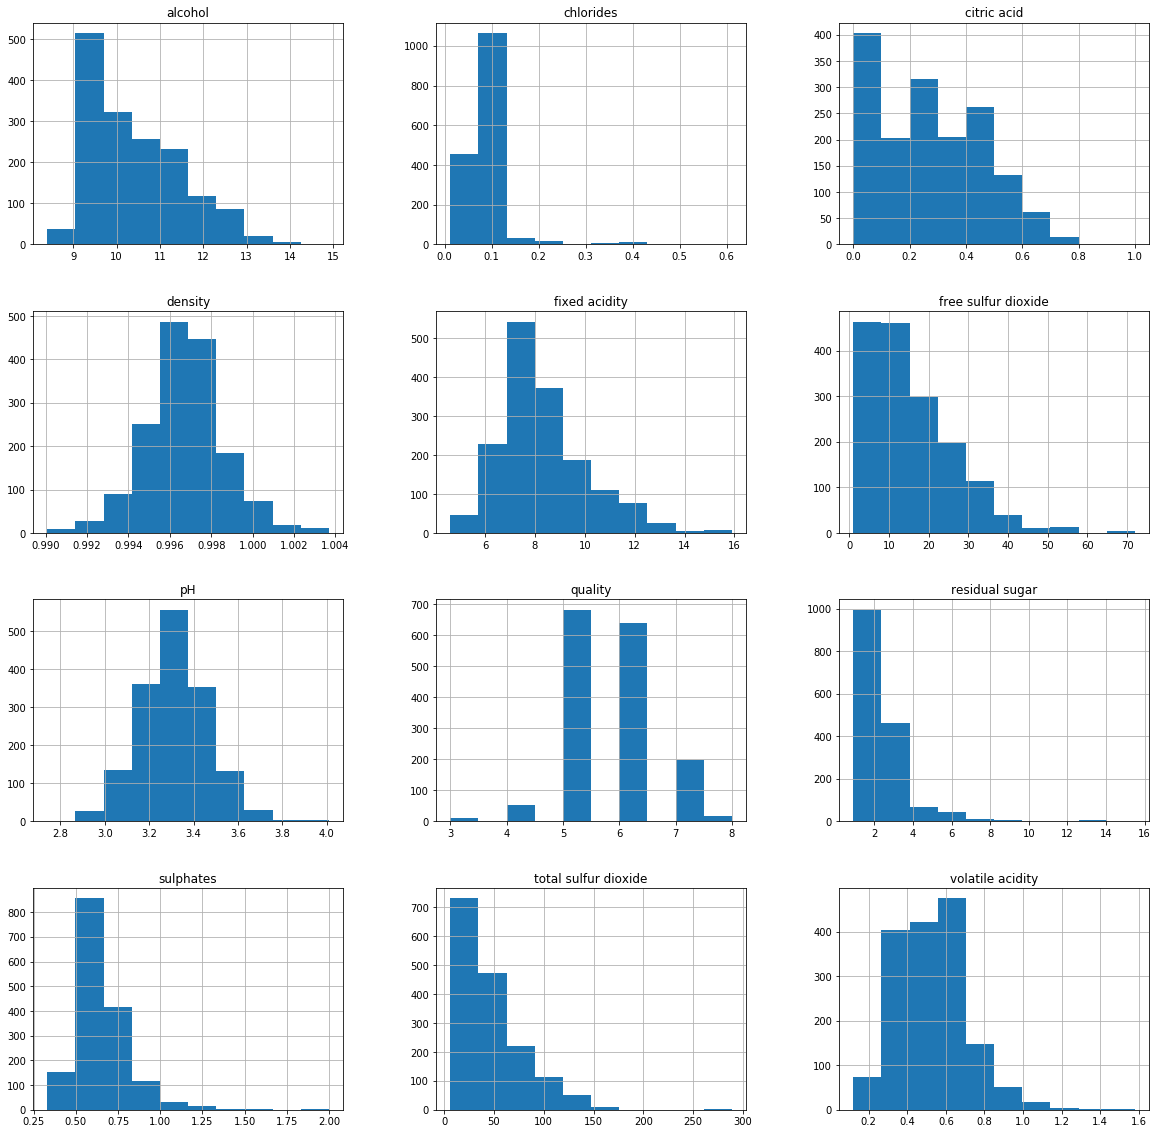

In [554]:
'''
Histogram of the values of the dataset for each feature
'''
d2.hist(figsize = (20, 20))
plt.show()

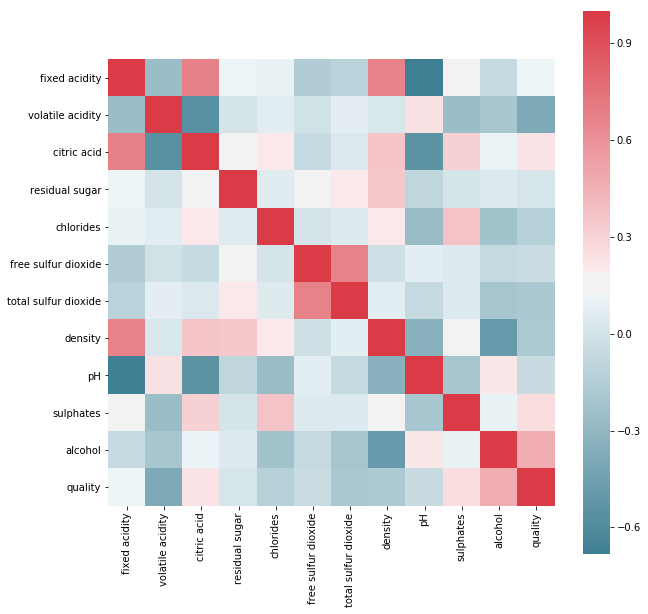

In [6]:
'''
Correlation between features and response
'''
#correlation
f, ax = plt.subplots(figsize=(10, 10))
corr = d2.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

## Implementing kNN for regression problem(Wine Dataset)

In [563]:
len(xTrain_d2.columns)

8

In [574]:
'''
Perform Prediction and evaluate the result 
'''
MSE(yTest_d2,KNN(xTest_d2,xTrain_d2,yTrain_d2,8,cls=False,K=12))

0.6341724537037038

### Choosing the value of K using cross validation on the training set.
- We run KNN for a series of K values and observe K for which the MSE is minimum

Text(0.5, 1.0, 'KNN  on Validation Set(Regression) Euclidean Distance')

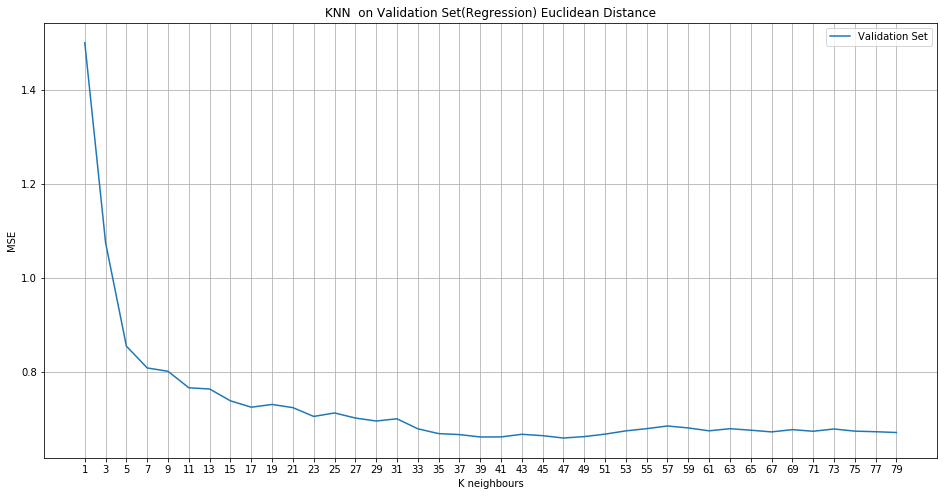

In [677]:
'''
Here we create a single validation set, and run KNN for a series of K value
We observe the smallest K value having smallest MSE
USING EUCLIDEAN DISTANCE
'''
mse = {}
fig,ax = plt.subplots(figsize=(16,8))

for i in range(1,80,2):
    mse[i] = MSE(yTrain_d2[len(yTrain_d2)-40:],KNN(xTrain_d2[len(xTrain_d2)-40:],xTrain_d2[:-40],yTrain_d2[:-40],8,cls=False,K=i))

#plt.xticks(mse.keys())
ax.plot(mse.keys(),mse.values())
ax.set_xlabel('K neighbours')
ax.set_ylabel('MSE')
ax.grid()
plt.xticks(range(1,80,2))
ax.legend(['Validation Set'])
ax.set_title(f"KNN  on Validation Set(Regression) Euclidean Distance")

Text(0.5, 1.0, 'KNN Validation Set(Regression) Taxicab distance')

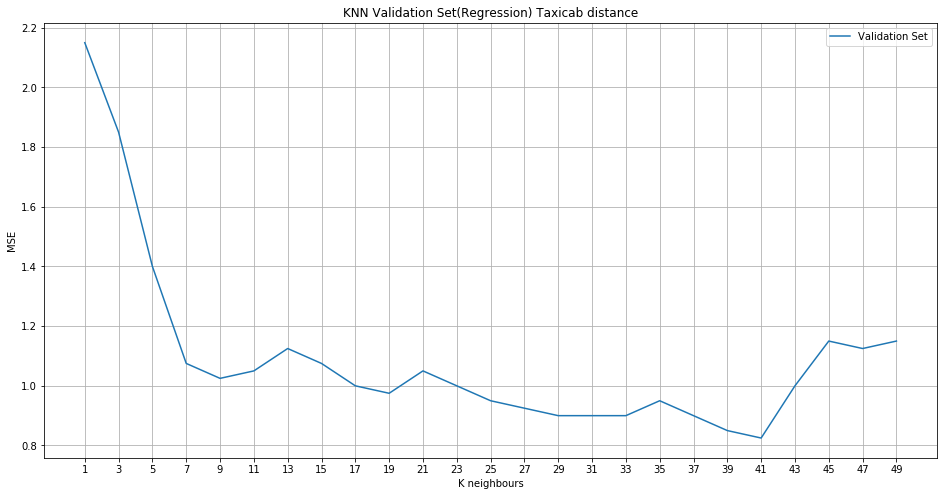

In [698]:
'''
Here we create a single validation set(size = 40), and run KNN for a series of K value
We observe the smallest K value having smallest MSE
USING TAXICAB DISTANCE
'''
mse = {}
fig,ax = plt.subplots(figsize=(16,8))

for i in range(1,50,2):
    mse[i] = MSE(yTrain_d2[len(yTrain_d2)-40:],KNN(xTrain_d2[len(xTrain_d2)-40:],
                                                   xTrain_d2[:-40],yTrain_d2[:-40],4,cls=True,K=i,d=dist))
    #plt.xticks(mse.keys())
ax.plot(mse.keys(),mse.values())
ax.set_xlabel('K neighbours')
ax.set_ylabel('MSE')
ax.grid()
plt.xticks(range(1,50,2))
ax.legend(['Validation Set'])
ax.set_title(f"KNN Validation Set(Regression) Taxicab distance")

In [703]:
'''
Perform prediction on range of K values
This is done to correlate the performance seen during cross validation and test set
'''
test_mse = {}
train_mse = {}
for i in range(1,100,10):
    test_mse[i] = MSE(yTest_d2,KNN(xTest_d2,xTrain_d2,yTrain_d2,8,cls=False,K=i))
for i in range(1,100,10):
    train_mse[i] = MSE(yTrain_d2,KNN(xTrain_d2,xTrain_d2,yTrain_d2,8,cls=False,K=i))
#plt.xticks(mse.keys())

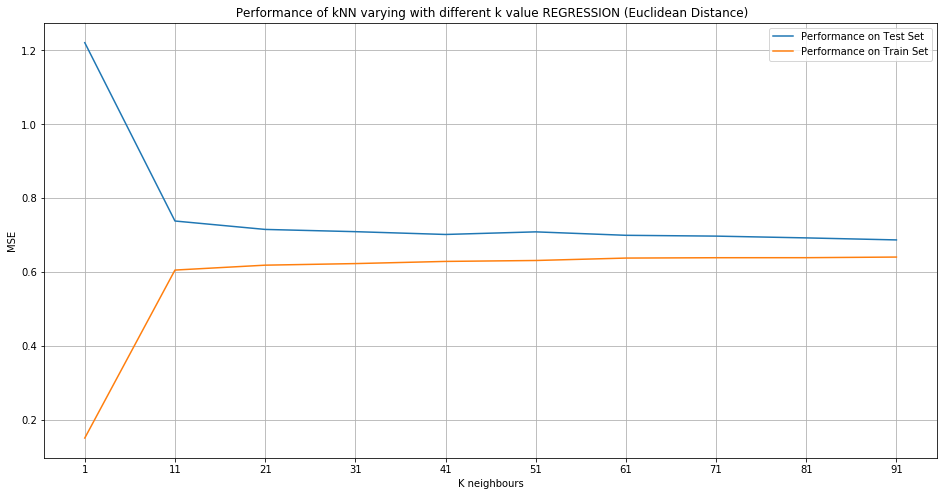

In [705]:
'''
Plotting the results 
EUCLIDEAN DISTANCE MEASURE
'''
fig,ax = plt.subplots(figsize=(16,8))
ax.grid()
plt.xticks(range(1,100,10))
ax.set_xlabel('K neighbours')
ax.set_ylabel('MSE')
ax.set_title(f" Performance of kNN varying with different k value REGRESSION (Euclidean Distance)")
ax.plot(test_mse.keys(),test_mse.values(),train_mse.keys(),train_mse.values())
ax.legend(["Performance on Test Set","Performance on Train Set"])

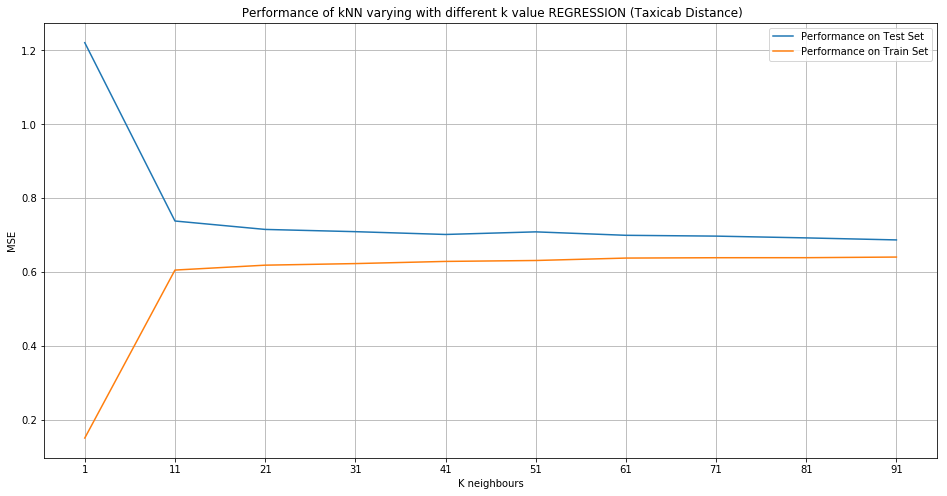

In [704]:
'''
Plotting the results 
TAXICAB DISTANCE MEASURE
'''
'''
Perform prediction on range of K values
This is done to correlate the performance seen during cross validation and test set
'''
test_mse = {}
train_mse = {}
for i in range(1,100,10):
    test_mse[i] = MSE(yTest_d2,KNN(xTest_d2,xTrain_d2,yTrain_d2,8,cls=False,K=i,d=dist))
for i in range(1,100,10):
    train_mse[i] = MSE(yTrain_d2,KNN(xTrain_d2,xTrain_d2,yTrain_d2,8,cls=False,K=i,d=dist))
#plt.xticks(mse.keys())

fig,ax = plt.subplots(figsize=(16,8))
ax.grid()
plt.xticks(range(1,100,10))
ax.set_xlabel('K neighbours')
ax.set_ylabel('MSE')
ax.set_title(f" Performance of kNN varying with different k value REGRESSION (Taxicab Distance)")
ax.plot(test_mse.keys(),test_mse.values(),train_mse.keys(),train_mse.values())
ax.legend(["Performance on Test Set","Performance on Train Set"])

#### KNN model moves from overfit to underfit as we increase the value of K.
#### At K =1 , model is very rigid, hence it fits the training set very well, however test set performs very poorly on such model,as we increase value of K further the error starts to increase for Train and decrease for test set
#### Based on validation set's result, we can estimate our k to be around 47

In [579]:
'''
Using the inference from Validation Error estimate and predict 
'''
y_pred = KNN(xTest_d2,xTrain_d2,yTrain_d2,8,cls=False,K=47)
print(MSE(y_pred,yTest_d2))

0.5984331955922867


## Compare KNN algorithm with Tree based method regression.
- We create a pipeline to normalize the data, create dictionaries of various hyperparameter for each model
- We perform gridsearch for these parameters
- We further plot these gridsearch results and choose the model with best parameter and perform our predicition

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [45]:
'''
Create Pipeline for both KNN and Decision Tree Classifier
'''

knn_d2 = Pipeline([
    ("standardize", StandardScaler()),
    ("classifier", KNeighborsRegressor())
])
dt_d2 = Pipeline([
    ("standardize", StandardScaler()),
    ("classifier", DecisionTreeRegressor())
])

'''
Create Parameter grid for performing 
'''

param_grid = [{"classifier__n_neighbors" :  np.arange(1, 50, 2),"classifier__weights" : ['uniform','distance'],"classifier__p" : [1,2]},
    {"classifier__max_depth" : np.arange(1, 100, 10),"classifier__max_features" : np.arange(1, 5, 1)}]

'''
Create Pipeline for both KNN and Decision Tree Classifier
'''

gridknn_d2 = GridSearchCV(knn_d2, cv = 5, n_jobs = 5, param_grid = param_grid[0], verbose = 1)
gridknn_d2.fit(xTrain_d2, yTrain_d2)

griddecision_d2 = GridSearchCV(dt_d2, cv = 5, n_jobs = 5, param_grid = param_grid[1], verbose = 1)
griddecision_d2.fit(xTrain_d2, yTrain_d2)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done 370 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 500 out of 500 | elapsed:    3.9s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=5)]: Done 200 out of 200 | elapsed:    0.5s finished
C:\Users\Anurag\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classifier', DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'))]),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'classifier__max_depth': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91]), 'classifier__max_features': array([1, 2, 3, 4])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

Optimal Hyperparameters 
{'classifier__n_neighbors': 37, 'classifier__p': 1, 'classifier__weights': 'distance'}

Best score 0.4399047762869488


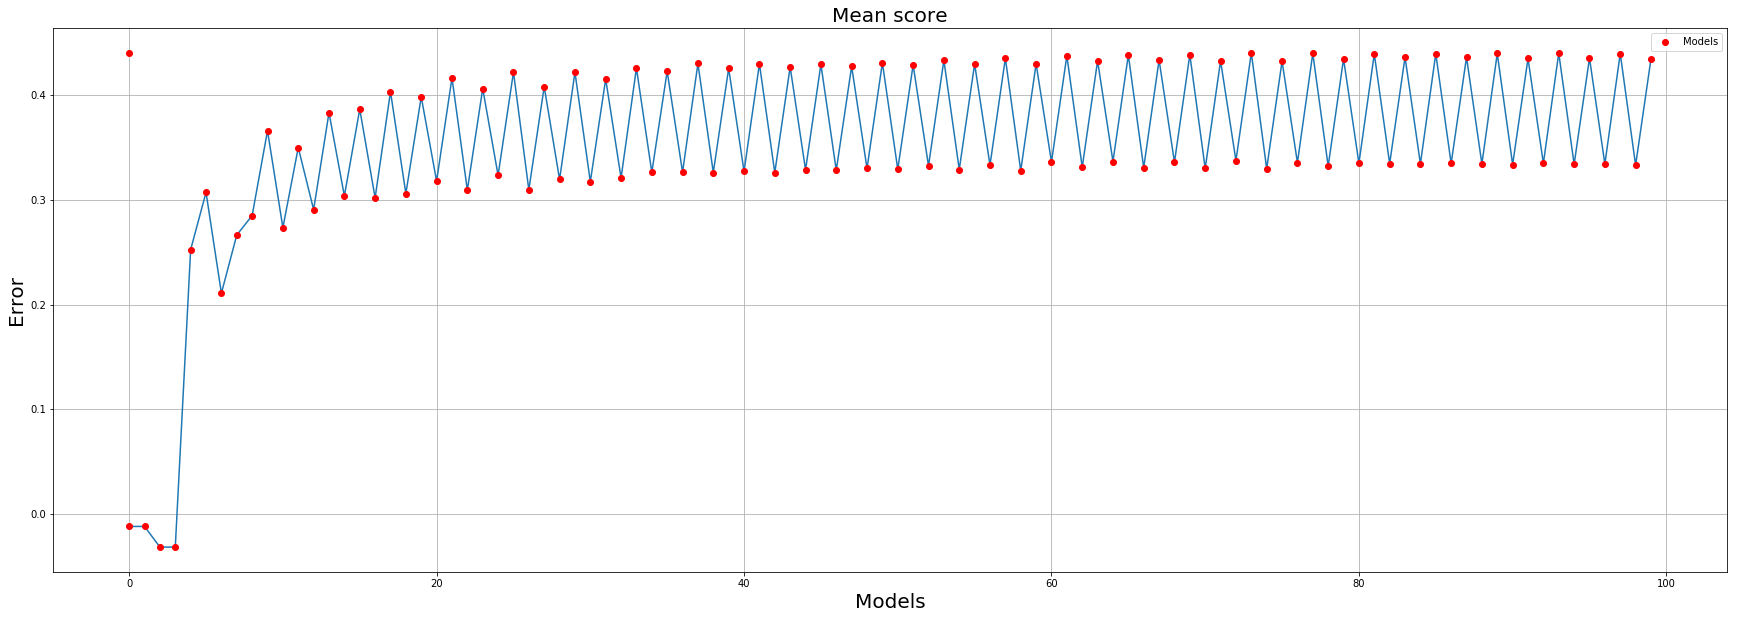

In [46]:
'''
Plotting the results for KNN GridSearch
'''
print("Optimal Hyperparameters \n" + str(gridknn_d2.best_params_) + "\n")
print("Best score " + str(gridknn_d2.best_score_))

plt.figure(figsize = (30, 10))
plt.title("Mean score", fontsize = 20)
plt.plot(gridknn_d2.cv_results_["mean_test_score"])
plt.plot(gridknn_d2.cv_results_["mean_test_score"], "ro", label = "Models")
plt.plot(gridknn_d2.best_score_, "ro")
plt.xlabel('Models', fontsize = 20)
plt.ylabel('Error', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

Optimal Hyperparameters 
{'classifier__max_depth': 1, 'classifier__max_features': 2}

Best score 
0.12266734834187729


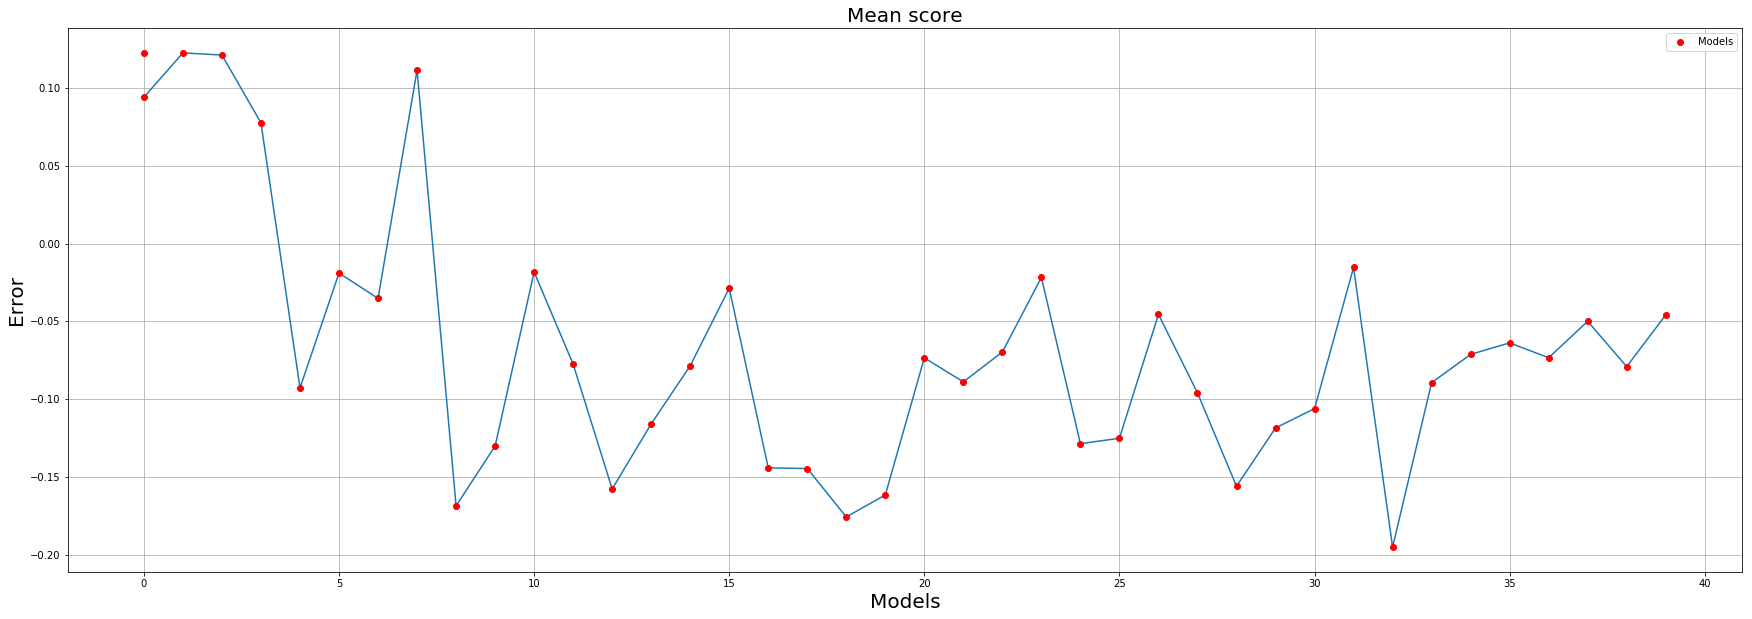

In [47]:
'''
Plotting the results for Decision Tree GridSearch
'''
print("Optimal Hyperparameters \n" + str(griddecision_d2.best_params_) + "\n")
print("Best score \n" + str(griddecision_d2.best_score_))
plt.figure(figsize = (30, 10))
plt.title("Mean score", fontsize = 20)
plt.grid()
plt.plot(griddecision_d2.cv_results_["mean_test_score"])
plt.plot(griddecision_d2.cv_results_["mean_test_score"], "ro", label = "Models")
plt.plot(griddecision_d2.best_score_, "ro")
plt.xlabel('Models', fontsize = 20)
plt.ylabel('Error', fontsize = 20)
plt.legend()
plt.show()

In [56]:
scoreKNN = cross_validate(knn_d2.set_params(**gridknn_d2.best_params_), xTest_d2, yTest_d2,verbose =0)
scoreDecision = cross_validate(dt_d2.set_params(**griddecision_d2.best_params_), xTest_d2, yTest_d2,verbose =0)
'''
Fitting time and test score for 3 cv folds
'''
print('===============FITTING TIME=========================')
print("KNN :",scoreKNN['fit_time'])
print("DT :",scoreDecision['fit_time'])
print('===============TEST SCORE=========================')
print("KNN :",scoreKNN['test_score'])
print("DT :",scoreDecision['test_score'])


===============FITTING TIME=========================
KNN : [0.00498772 0.00199437 0.00699091]
DT : [0.00199318 0.00199461 0.00199485]
===============TEST SCORE=========================
KNN : [0.25589358 0.2922411  0.29843536]
DT : [0.11238964 0.04017354 0.01409445]


### Hence the optimal parameter K as predicted using Scikit is 37 with taxicab distance as metric and through our assumption for taxicab our estimated k is 41.
### In general KNN has higher test error and a higher fitting time compared to Decision Tree.

## Implementing kNN for classification problem(Iris Dataset)
- Implement kNN, choose a single value of k and perform prediction 
- Create an evaluation metric and defend it 
- Estimate the best k value (sqrt(n)) and evaluate the performance
- Run it on range of values and verify your estimate

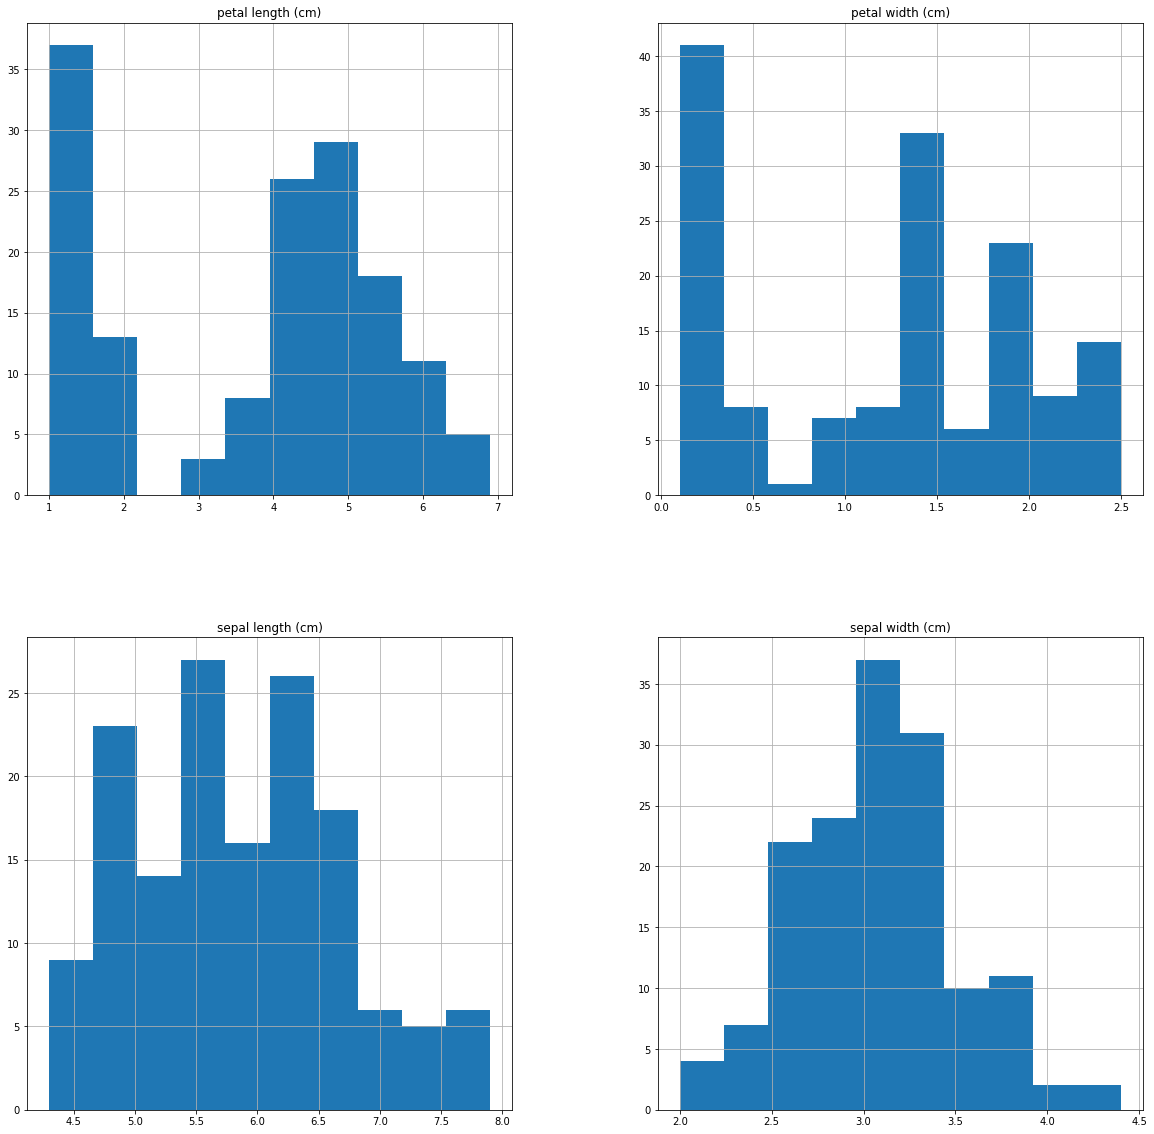

In [390]:
'''
We find the distribution of values among Iris dataset
'''
d1.hist(figsize = (20, 20))
plt.show()

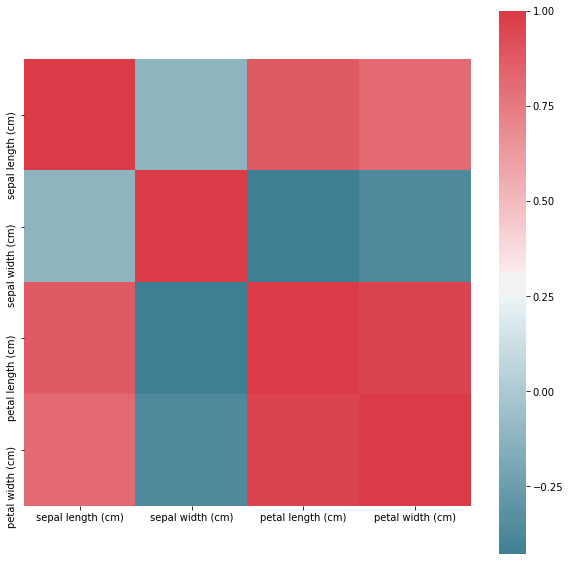

In [393]:
#correlation
'''
Correlation among the features (not response)
'''
f, ax = plt.subplots(figsize=(10, 10))
corr = d1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

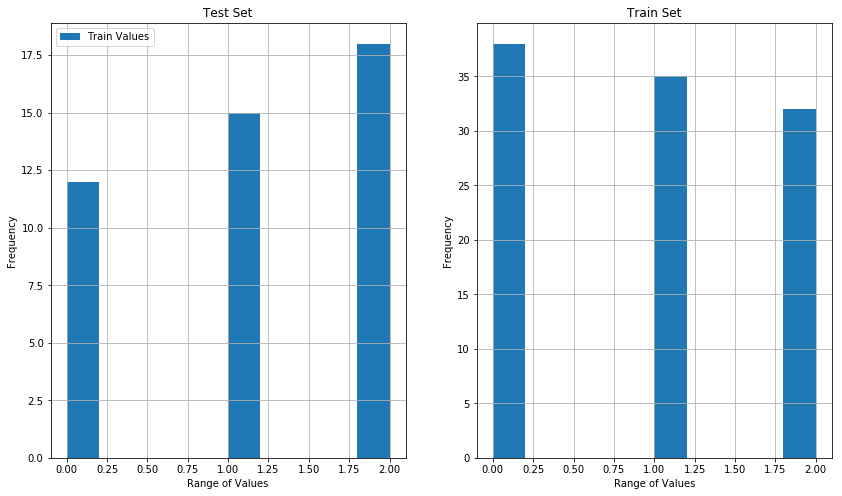

In [22]:
'''
Since the values of the train set are uniformaly distributed we can use MCR as metric for measuring our model
'''
fig,ax = plt.subplots(1,2,figsize=(14,8))
ax[0].hist(yTest_d1)
ax[0].set_title('Test Set')
ax[0].grid()
ax[0].legend(['Test Values'])
ax[0].set_xlabel('Range of Values')
ax[0].set_ylabel('Frequency')
ax[1].set_xlabel('Range of Values')
ax[1].set_ylabel('Frequency')
ax[1].hist(yTrain_d1)
ax[1].set_title('Train Set')
ax[0].legend(['Train Values'])
ax[1].grid()

### Implement kNN, choose a single value of k and perform prediction. Evaluation metric I have used is Misclassification Rate (MCR) since the response variables are uniformly distributed across the training and test data set.

Text(0.5, 1.0, 'Elbow Curve CLASSIFICATION (Euclidean Distance)')

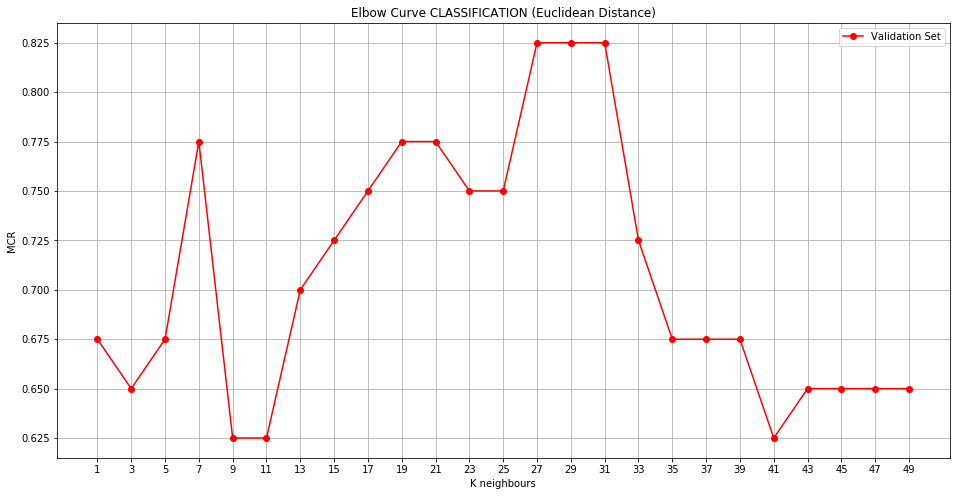

In [640]:
'''
Create a simple validation set and perform a round of classification to find K value which is minimum 
and has highest accuracy.
Euclidean Distance
'''
mcr = {}
fig,ax = plt.subplots(figsize=(16,8))

for i in range(1,50,2):
    mcr[i] = mcr(yTrain_d1[len(yTrain_d1)-40:],KNN(xTrain_d1[len(xTrain_d1)-40:],
                                                   xTrain_d1[:-40],yTrain_d1[:-40],4,cls=True,K=i))

ax.plot(mcr.keys(),mcr.values(),'-ro')
ax.set_xlabel('K neighbours')
ax.set_ylabel('MCR')
ax.grid()
plt.xticks(range(1,50,2))
ax.legend(['Validation Set'])
ax.set_title(f"Elbow Curve CLASSIFICATION (Euclidean Distance)")

Text(0.5, 1.0, 'Elbow Curve CLASSIFICATION (Taxicab Distance)')

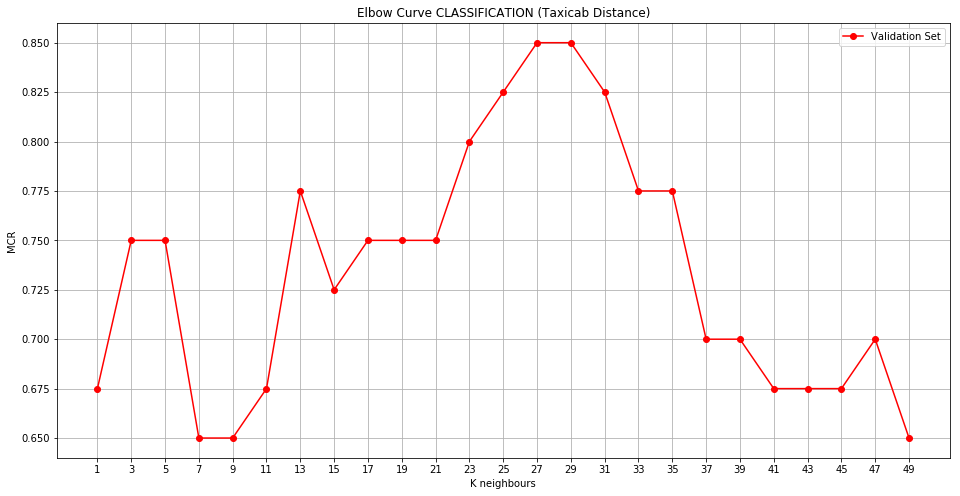

In [651]:
'''
Create a simple validation set and perform a round of classification to find K value which is minimum 
and has highest accuracy.
Taxicab Distance
'''

mcr = {}
fig,ax = plt.subplots(figsize=(16,8))

for i in range(1,50,2):
    mcr[i] = mcr(yTrain_d1[len(yTrain_d1)-40:],KNN(xTrain_d1[len(xTrain_d1)-40:],
                                                   xTrain_d1[:-40],yTrain_d1[:-40],4,cls=True,K=i,d=dist))

ax.plot(mcr.keys(),mcr.values(),'-ro')
ax.set_xlabel('K neighbours')
ax.set_ylabel('MCR')
ax.grid()
plt.xticks(range(1,50,2))
ax.legend(['Validation Set'])
ax.set_title(f"Elbow Curve CLASSIFICATION (Taxicab Distance)")

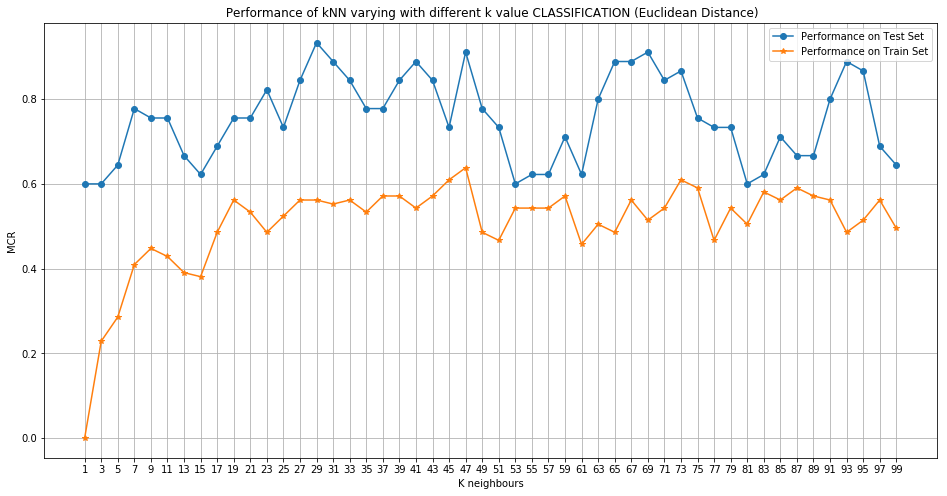

In [648]:
#Performing KNN for Wine regression 
%matplotlib inline
'''
Perform prediction on range of K values
This is done to correlate the performance seen during cross validation with test set.
Euclidean Distance
'''

import matplotlib.pyplot as plt
test_mcr = {}
train_mcr = {}
for i in range(1,100,2):
    test_mcr[i] = mcr(yTest_d1,KNN(xTest_d1,xTrain_d1,yTrain_d1,4,cls=True,K=i))
for i in range(1,100,2):
    train_mcr[i] = mcr(yTrain_d1,KNN(xTrain_d1,xTrain_d1,yTrain_d1,4,cls=True,K=i))
#plt.xticks(mse.keys())

fig,ax = plt.subplots(figsize=(16,8))
ax.grid()
ax.set_xlabel('K neighbours')
ax.set_ylabel('MCR')
plt.xticks(range(1,100,2))
ax.set_title(f" Performance of kNN varying with different k value CLASSIFICATION (Euclidean Distance)")
ax.plot(test_mcr.keys(),test_mcr.values(),'-o',train_mcr.keys(),train_mcr.values(),'-*')
ax.legend(["Performance on Test Set","Performance on Train Set"])

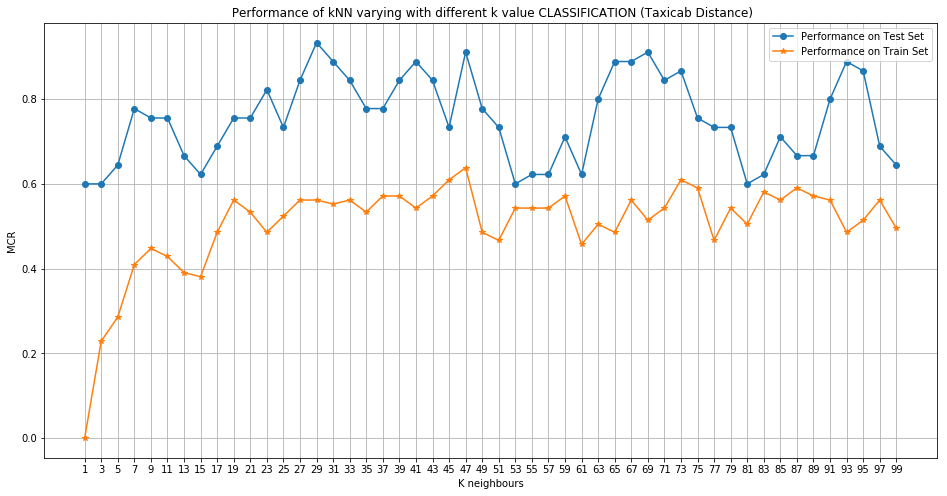

In [649]:
#Performing KNN for Wine regression 
%matplotlib inline
'''
Perform prediction on range of K values
This is done to correlate the performance seen during cross validation with test set.
Taxicab Distance
'''

import matplotlib.pyplot as plt
test_mcr = {}
train_mcr = {}
for i in range(1,100,2):
    test_mcr[i] = mcr(yTest_d1,KNN(xTest_d1,xTrain_d1,yTrain_d1,4,cls=True,K=i,d=dist))
for i in range(1,100,2):
    train_mcr[i] = mcr(yTrain_d1,KNN(xTrain_d1,xTrain_d1,yTrain_d1,4,cls=True,K=i,d=dist))
#plt.xticks(mse.keys())

fig,ax = plt.subplots(figsize=(16,8))
ax.grid()
ax.set_xlabel('K neighbours')
ax.set_ylabel('MCR')
plt.xticks(range(1,100,2))
ax.set_title(f" Performance of kNN varying with different k value CLASSIFICATION (Taxicab Distance)")
ax.plot(test_mcr.keys(),test_mcr.values(),'-o',train_mcr.keys(),train_mcr.values(),'-*')
ax.legend(["Performance on Test Set","Performance on Train Set"])

#### As we increase the value of K our model moves from becoming overfit to turning into underfit model, this can be seen through accuracy 1 or 100% for train set with degree = 1.

#### We can estimate the optimal degree of K to be around 9 based on our validation set data (since k=9 has lowest MCR )

In [665]:
'''
Peforming prediction using k = 11 from above inferences
'''

eucError = mcr(yTest_d1,KNN(xTest_d1,xTrain_d1,yTrain_d1,4,cls=False,K=9))
print(eucError)

0.5232323232323


## Compare KNN algorithm with Tree based method classification.
- We create a pipeline to normalize the data, create dictionaries of various hyperparameter for each model
- We perform gridsearch for these parameters
- We further plot these gridsearch results and choose the model with best parameter and perform our predicition

## Create pipeline and perform GridSearch

In [57]:
'''
Create Pipeline for both KNN and Decision Tree Classifier
'''
knn_d1 = Pipeline([
    ("normalizer", StandardScaler()),
    ("classifier", KNeighborsClassifier())
])
dt_d1 = Pipeline([
    ("normalizer", StandardScaler()),
    ("classifier", DecisionTreeClassifier())
])
'''
Define the parameter grid to be explored
'''
param_grid = [{"classifier__n_neighbors" :  np.arange(1, 50, 2),
               "classifier__weights" : ['uniform','distance'],
               "classifier__p" : [1,2]},
    {"classifier__max_depth" : np.arange(1, 100, 10),
     "classifier__max_features" : np.arange(1, 5, 1)}]

'''
Peform GridSearch
'''
gridknn_d1 = GridSearchCV(knn_d1, cv = 5, n_jobs = 5,
                          param_grid = param_grid[0], verbose = 1, refit = True)
gridknn_d1.fit(xTrain_d1, yTrain_d1)

griddecision_d1 = GridSearchCV(dt_d1, cv = 5, n_jobs = 5, 
                               param_grid = param_grid[1], verbose = 1, refit = True)
griddecision_d1.fit(xTrain_d1, yTrain_d1)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   19.9s
[Parallel(n_jobs=5)]: Done 500 out of 500 | elapsed:   21.9s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=5)]: Done 200 out of 200 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('normalizer', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classifier', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))]),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'classifier__max_depth': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91]), 'classifier__max_features': array([1, 2, 3, 4])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

### KNN GridSearch

Optimal parameters 
{'classifier__n_neighbors': 13, 'classifier__p': 2, 'classifier__weights': 'uniform'}

Best score 0.9904761904761905


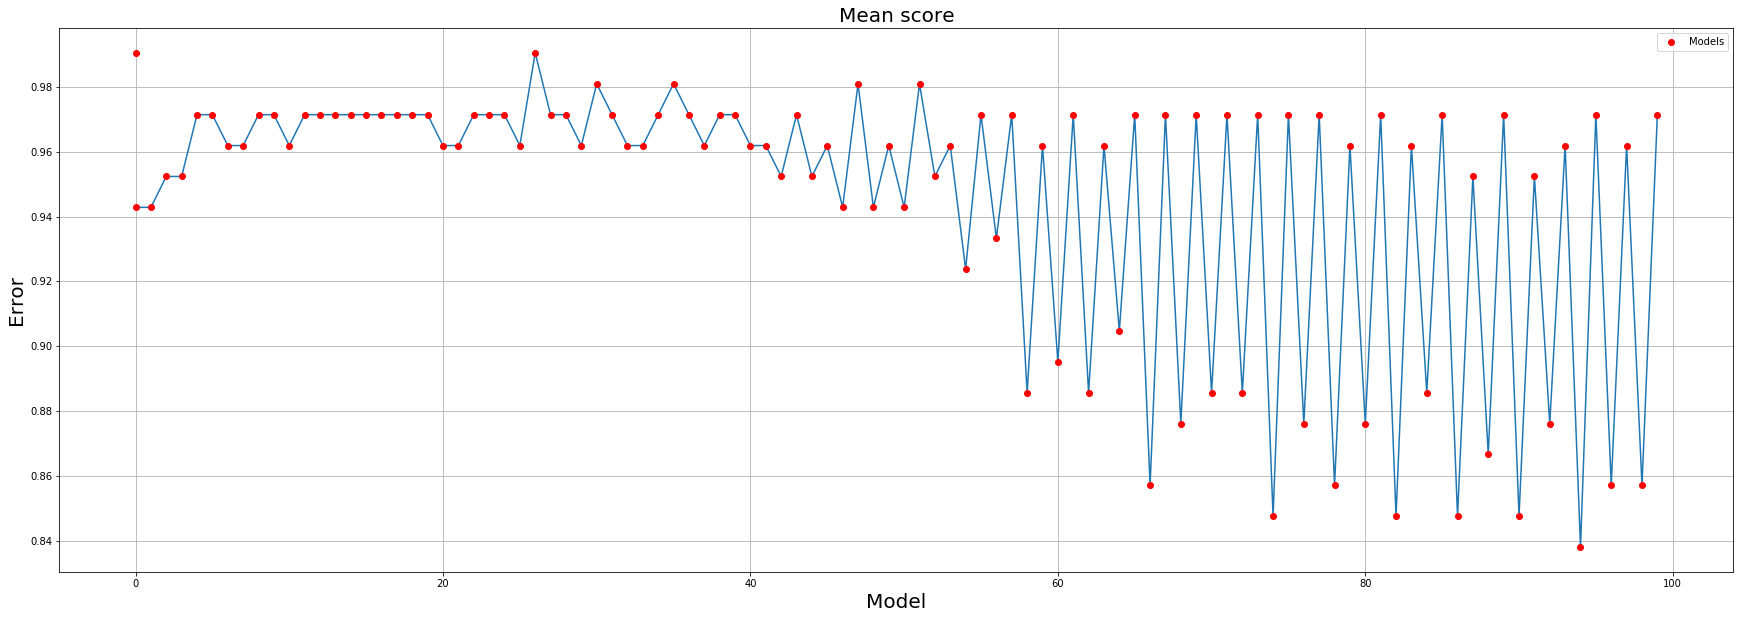

In [59]:
'''
Plotting result of GridSearch on KNN Classifier
'''
print("Optimal parameters \n" + str(gridknn_d1.best_params_) + "\n")
print("Best score " + str(gridknn_d1.best_score_))
plt.figure(figsize = (30, 10))
plt.title("Mean score", fontsize = 20)
plt.plot(gridknn_d1.cv_results_["mean_test_score"])
plt.plot(gridknn_d1.cv_results_["mean_test_score"], "ro", label = "Models")
plt.plot(gridknn_d1.best_score_, "ro")
plt.xlabel('Model', fontsize = 20)
plt.ylabel('Error', fontsize = 20)
plt.grid()
plt.legend()
plt.show()

### Decision Tree GridSearch

Optimal parameters 
{'classifier__max_depth': 81, 'classifier__max_features': 3}

Best score 0.9619047619047619


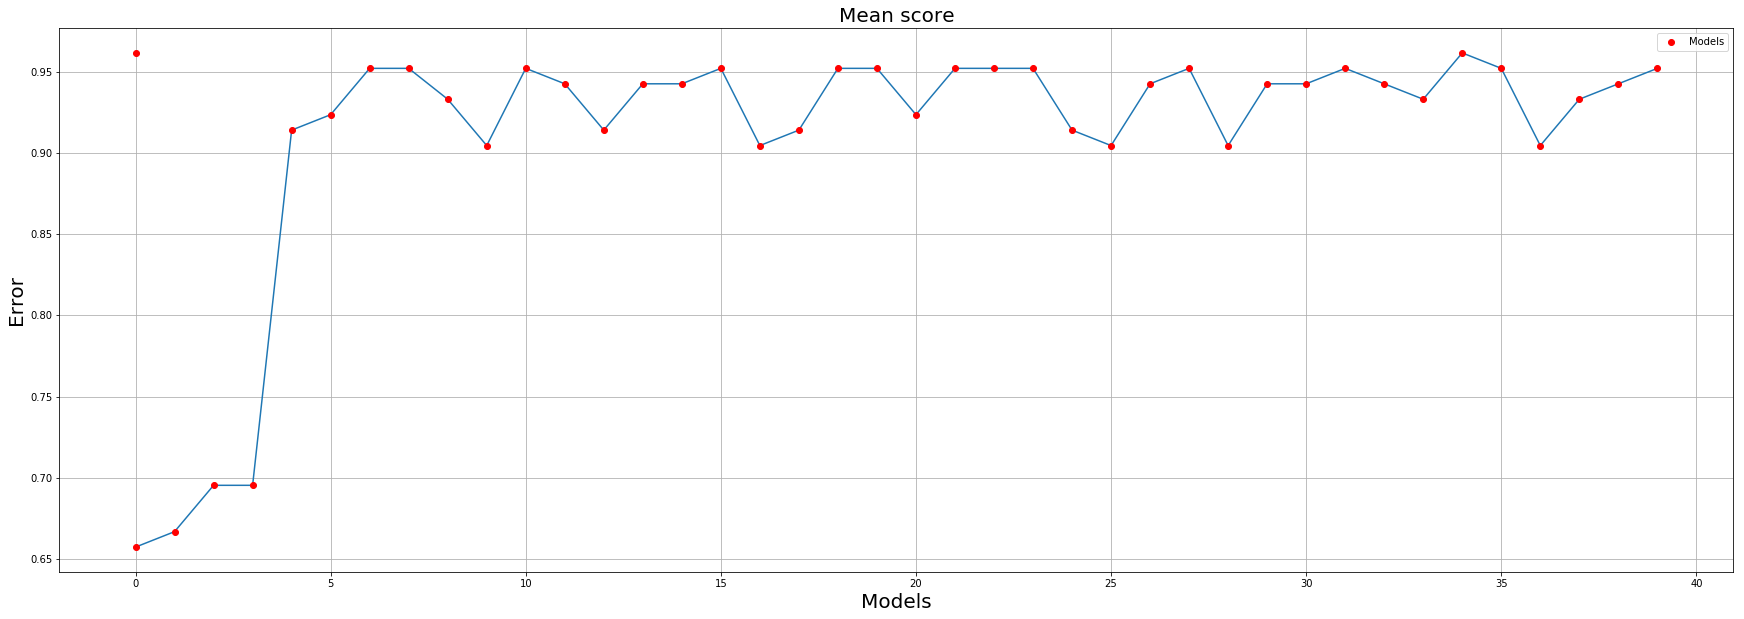

In [39]:
'''
Plotting the results of GridSearch on Decision Tree
'''
print("Optimal parameters \n" + str(griddecision_d1.best_params_) + "\n")
print("Best score " + str(griddecision_d1.best_score_))
plt.figure(figsize = (30, 10))
plt.title("Mean score", fontsize = 20)
plt.grid()
plt.plot(griddecision_d1.cv_results_["mean_test_score"])
plt.plot(griddecision_d1.cv_results_["mean_test_score"], "ro", label = "Models")
plt.plot(griddecision_d1.best_score_, "ro")
plt.xlabel('Models', fontsize = 20)
plt.ylabel('Error', fontsize = 20)
plt.legend()
plt.show()

#### Performing the prediction using the model with best parameters and plotting the results using boxplot.

In [61]:
scoreKNN = cross_validate(knn_d1.set_params(**gridknn_d1.best_params_), xTest_d1, yTest_d1,verbose =0)
scoreDecision = cross_validate(dt_d1.set_params(**griddecision_d1.best_params_), xTest_d1, yTest_d1,verbose =0)
'''
Fitting time and test score for 3 cv folds
'''
print('===============FITTING TIME=========================')
print('For KNN',scoreKNN['fit_time'])
print('For Decision Tree',scoreDecision['fit_time'])
print('===============TEST SCORE=========================')
print('For KNN',scoreKNN['test_score'])
print('For Decision Tree',scoreDecision['test_score'])


===============FITTING TIME=========================
For KNN [0.11221051 0.00902772 0.00297809]
For Decision Tree [0.00299525 0.00199461 0.00199461]
===============TEST SCORE=========================
For KNN [0.8125     0.93333333 0.92857143]
For Decision Tree [0.6875     0.8        0.78571429]


### Decision tree performed better on the basis of test score, also decision tree has lower fitting time in both classification and regression.
### Scikit produced optimal parameter as k= 13 with euclidean distance, whereas our assumption predicted it as 9

In [9]:
import numpy as np
X=np.array([-3.5,-2.5-1.5,-0.5,0.5,1.5,2.5,3.5])
Y=np.array([1,1,1,1,1,1,1,1])

def avg(X,Y):
    return np.mean(X),np.mean(Y)



In [10]:
avg(X,Y)

(0.0, 1.0)

In [6]:
np.mean(Y)

3.5